In [2]:
# prompt: saya ingin memanggil data Naruto.csv yang telah saya unggah

import pandas as pd

# Ganti 'Prabowo.csv' dengan nama file yang sesuai jika berbeda
Naruto = pd.read_csv('Naruto.csv')

# Menampilkan beberapa baris pertama data untuk verifikasi
print(Naruto.head())


   conversation_id_str  created_at  favorite_count  \
0                    1  2025-03-17             207   
1                    2  2025-03-13              14   
2                    3  2025-03-09              80   
3                    4  2025-03-15              31   
4                    5  2025-03-16             127   

                        full_text  id_str  image_url  in_reply_to_screen_name  \
0  Naruto is the best anime ever!       1        NaN                      NaN   
1  Ichiraku Ramen looks so good 😭       2        NaN                      NaN   
2  Naruto is the best anime ever!       3        NaN                      NaN   
3  Ichiraku Ramen looks so good 😭       4        NaN                      NaN   
4     Naruto openings are elite 🔥       5        NaN                      NaN   

  lang  location  quote_count  reply_count  retweet_count  tweet_url  \
0   en       NaN            0           17             13        NaN   
1   en       NaN            0            6  

In [3]:
Naruto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      200 non-null    int64  
 1   created_at               200 non-null    object 
 2   favorite_count           200 non-null    int64  
 3   full_text                200 non-null    object 
 4   id_str                   200 non-null    int64  
 5   image_url                0 non-null      float64
 6   in_reply_to_screen_name  0 non-null      float64
 7   lang                     200 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              200 non-null    int64  
 10  reply_count              200 non-null    int64  
 11  retweet_count            200 non-null    int64  
 12  tweet_url                0 non-null      float64
 13  user_id_str              200 non-null    int64  
 14  username                 2

**Tahapan Cleaning Data**

In [4]:
Naruto["full_text"]

,full_text
0,Naruto is the best anime ever!
1,Ichiraku Ramen looks so good 😭
2,Naruto is the best anime ever!
3,Ichiraku Ramen looks so good 😭
4,Naruto openings are elite 🔥
...,...
195,Naruto is the best anime ever!
196,Naruto's story is so inspirational.
197,Shikamaru is seriously underrated.
198,Naruto openings are elite 🔥


In [5]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [6]:
#membuat sebuah variabel baru untuk menyimpan data hasil cleaning

Naruto["text_clean"] = ''

In [7]:
#Pembersihan text dari symbol
for i, row in Naruto.iterrows():
    Naruto.at[i, "text_clean"] = clean(row.full_text)

In [8]:
Naruto.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1,2025-03-17,207,Naruto is the best anime ever!,1,NaN,NaN,en,NaN,0,17,13,NaN,1,@naruto_fan,Naruto is the best anime ever!
1,2,2025-03-13,14,Ichiraku Ramen looks so good 😭,2,NaN,NaN,en,NaN,0,6,43,NaN,2,@leafshinobi,Ichiraku Ramen looks so good 😭
2,3,2025-03-09,80,Naruto is the best anime ever!,3,NaN,NaN,en,NaN,0,16,49,NaN,3,@anime_binger,Naruto is the best anime ever!
3,4,2025-03-15,31,Ichiraku Ramen looks so good 😭,4,NaN,NaN,en,NaN,0,6,25,NaN,4,@team7fan,Ichiraku Ramen looks so good 😭
4,5,2025-03-16,127,Naruto openings are elite 🔥,5,NaN,NaN,en,NaN,0,5,25,NaN,5,@otakucorner,Naruto openings are elite 🔥


In [9]:
Naruto[["full_text", "text_clean"]].head()

,full_text,text_clean
0,Naruto is the best anime ever!,Naruto is the best anime ever!
1,Ichiraku Ramen looks so good 😭,Ichiraku Ramen looks so good 😭
2,Naruto is the best anime ever!,Naruto is the best anime ever!
3,Ichiraku Ramen looks so good 😭,Ichiraku Ramen looks so good 😭
4,Naruto openings are elite 🔥,Naruto openings are elite 🔥


NLTK Process

In [10]:
pip install nltk

In [11]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [12]:
#Contoh tokenisasi
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


In [13]:
# prompt: saya ingin melakukan tokenisasi seperi syntax 23 untuk Naruto["text_clean"]

# Tokenisasi kata pada kolom 'text_clean'
Naruto['tokenized_text'] = Naruto['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(Naruto[['text_clean', 'tokenized_text']].head())


                       text_clean                           tokenized_text
0  Naruto is the best anime ever!  [Naruto, is, the, best, anime, ever, !]
1  Ichiraku Ramen looks so good 😭    [Ichiraku, Ramen, looks, so, good, 😭]
2  Naruto is the best anime ever!  [Naruto, is, the, best, anime, ever, !]
3  Ichiraku Ramen looks so good 😭    [Ichiraku, Ramen, looks, so, good, 😭]
4     Naruto openings are elite 🔥        [Naruto, openings, are, elite, 🔥]


In [14]:
Naruto["tokenized_text"].head()

,tokenized_text
0,"[Naruto, is, the, best, anime, ever, !]"
1,"[Ichiraku, Ramen, looks, so, good, 😭]"
2,"[Naruto, is, the, best, anime, ever, !]"
3,"[Ichiraku, Ramen, looks, so, good, 😭]"
4,"[Naruto, openings, are, elite, 🔥]"


In [15]:
# prompt: saya ingin mengambil stopwords dalam bahasa indonesia

import nltk
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Indonesia
from nltk.corpus import stopwords
stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [16]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

In [17]:
# prompt: saya ingin melakukan stopwords di Naruto["tokenized_text"]

# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop_words_indonesia = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

# Menerapkan fungsi remove_stopwords ke kolom 'tokenized_text'
Naruto['tokenized_stopwords'] = Naruto['tokenized_text'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text_no_stopwords
Naruto[['tokenized_text', 'tokenized_stopwords']].head()


,tokenized_text,tokenized_stopwords
0,"[Naruto, is, the, best, anime, ever, !]","[Naruto, is, the, best, anime, ever, !]"
1,"[Ichiraku, Ramen, looks, so, good, 😭]","[Ichiraku, Ramen, looks, so, good, 😭]"
2,"[Naruto, is, the, best, anime, ever, !]","[Naruto, is, the, best, anime, ever, !]"
3,"[Ichiraku, Ramen, looks, so, good, 😭]","[Ichiraku, Ramen, looks, so, good, 😭]"
4,"[Naruto, openings, are, elite, 🔥]","[Naruto, openings, are, elite, 🔥]"


Stemming

In [18]:
#Contoh Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


In [19]:
# prompt: saya ingin melakukan stemming pada Naruto["tokenized_stopwords"] dalam bahasa indonesia

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada list token
def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

# Terapkan fungsi stemming_sastrawi ke kolom 'tokenized_stopwords'
Naruto['stemmed_words'] = Naruto['tokenized_stopwords'].apply(stemming_sastrawi)

# Menampilkan beberapa baris pertama data dengan kolom stemmed_words
Naruto[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[Naruto, is, the, best, anime, ever, !]","[naruto, is, the, best, anime, ever, ]"
1,"[Ichiraku, Ramen, looks, so, good, 😭]","[ichiraku, ramen, looks, so, good, ]"
2,"[Naruto, is, the, best, anime, ever, !]","[naruto, is, the, best, anime, ever, ]"
3,"[Ichiraku, Ramen, looks, so, good, 😭]","[ichiraku, ramen, looks, so, good, ]"
4,"[Naruto, openings, are, elite, 🔥]","[naruto, openings, are, elite, ]"
...,...,...
195,"[Naruto, is, the, best, anime, ever, !]","[naruto, is, the, best, anime, ever, ]"
196,"[Naruto, 's, story, is, so, inspirational, .]","[naruto, s, story, is, so, inspirational, ]"
197,"[Shikamaru, is, seriously, underrated, .]","[shikamaru, is, seriously, underrated, ]"
198,"[Naruto, openings, are, elite, 🔥]","[naruto, openings, are, elite, ]"


In [21]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
Naruto['sentiment_score'] = Naruto['stemmed_words'].apply(analyze_sentiment)

In [23]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(Naruto[['stemmed_words', 'sentiment_score']].head())


                            stemmed_words  sentiment_score
0  [naruto, is, the, best, anime, ever, ]           0.6369
1    [ichiraku, ramen, looks, so, good, ]           0.5777
2  [naruto, is, the, best, anime, ever, ]           0.6369
3    [ichiraku, ramen, looks, so, good, ]           0.5777
4        [naruto, openings, are, elite, ]           0.0000


In [24]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
Naruto['sentiment_label'] = Naruto['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(Naruto[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())


                            stemmed_words  sentiment_score sentiment_label
0  [naruto, is, the, best, anime, ever, ]           0.6369         positif
1    [ichiraku, ramen, looks, so, good, ]           0.5777         positif
2  [naruto, is, the, best, anime, ever, ]           0.6369         positif
3    [ichiraku, ramen, looks, so, good, ]           0.5777         positif
4        [naruto, openings, are, elite, ]           0.0000          netral


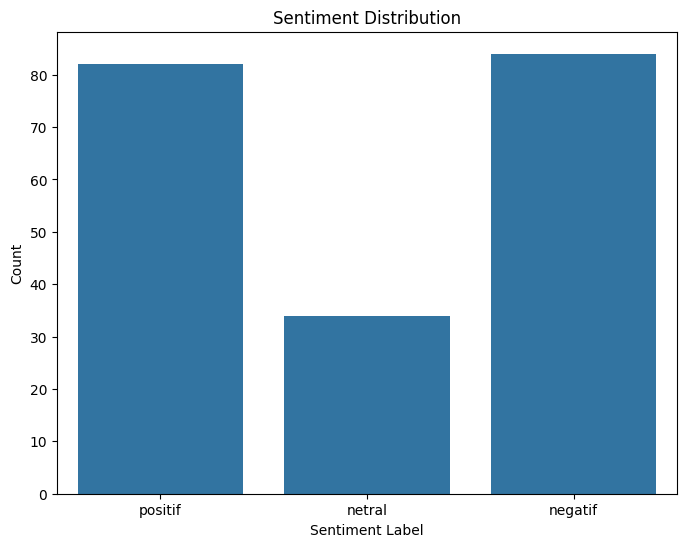

In [25]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=Naruto)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


In [26]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

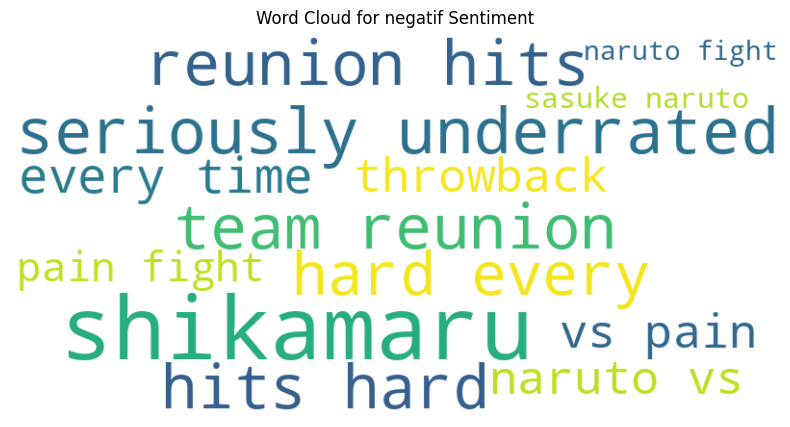

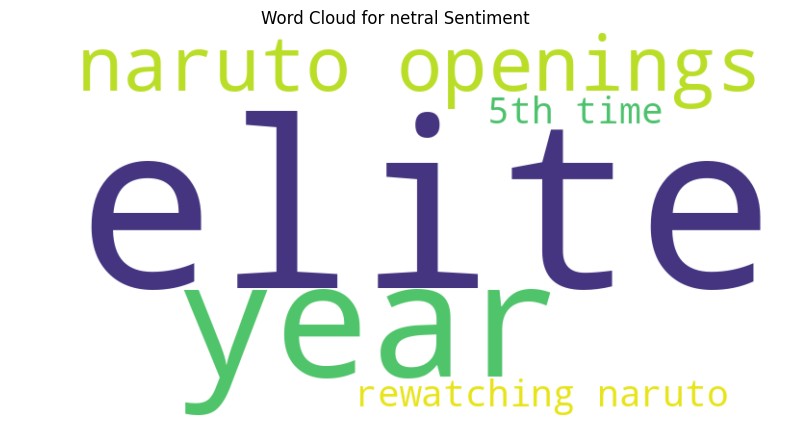

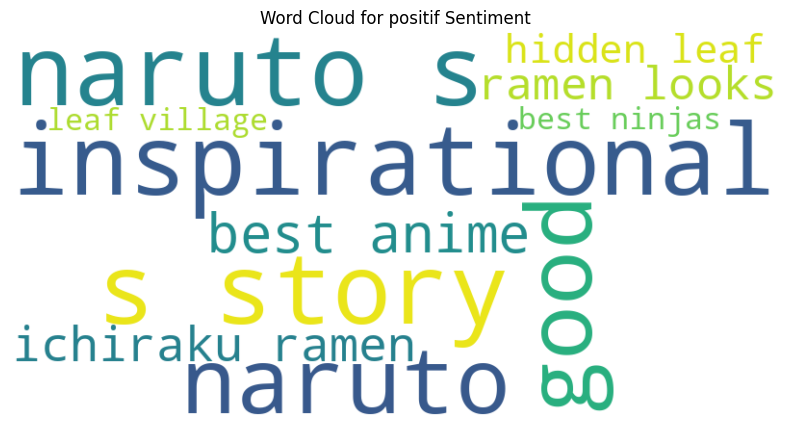

In [27]:

# Group data by sentiment label
sentiment_groups = Naruto.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


Membuat Model Mechine Learning Untuk Memprediksi Sentimen